In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from PIL import Image
from google.colab.patches import cv_imshow
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import joblib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [3]:
def canny_edge_detection(img_gray, minthreshold= 50, maxthreshold = 100):
    """
    image_path: link to image
    blur_ksize: Gaussian kernel size
    threshold1: min threshold
    threshold2: max threshold
    """
    # Perform Canny edge detection
    edges = cv.Canny(img_gray, minthreshold, maxthreshold)

    return edges

# Preprocessing image

In [4]:
dir_train = '/content/drive/MyDrive/CV_FinalProject/Source_code/Dataset/Train/crop_part1'
image_files = os.listdir(dir_train)
image_train = []
age_labels = []
gender_labels = []

p_age=[]
for image in image_files:
  image_path = os.path.join(dir_train, image)
  img = cv.imread(image_path)
  img = cv.resize(img, (128, 128))
  # convert BGR to gray
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  #using canny edge detection
  img = canny_edge_detection(gray)
  img_components = image.split('_')

  #age
  actual_age = int(img_components[0])
  if actual_age >= 0 and actual_age <= 6:
    p_age.append(0)
    if(age_labels.count(0) < 2000):
      age_labels.append(0)  # trẻ nhỏ
    else:
      continue
  elif actual_age >= 7 and actual_age <= 19:
    p_age.append(1)
    if(age_labels.count(1) <= 2000):
      age_labels.append(1)  #  Thiếu niên
    else:
      continue
  elif actual_age >= 20 and actual_age <=32 :
    p_age.append(2)
    if(age_labels.count(2) <= 2000):
      age_labels.append(2)  # Thanh niên
    else:
      continue
  elif actual_age >= 33 and actual_age <= 55:
    p_age.append(3)
    if(age_labels.count(3) <= 2000):
      age_labels.append(3)  # Trung niên
    else:
      continue
  else:  # actual_age >= 55
    p_age.append(4)
    if(age_labels.count(4) <= 2000):
      age_labels.append(4)  # Người cao tuổi
    else:
      continue
  #age
  gender_label = int(img_components[1])
  gender_labels.append(gender_label)
  image_train.append(img)

In [ ]:
gender_labels.count(0)

4121

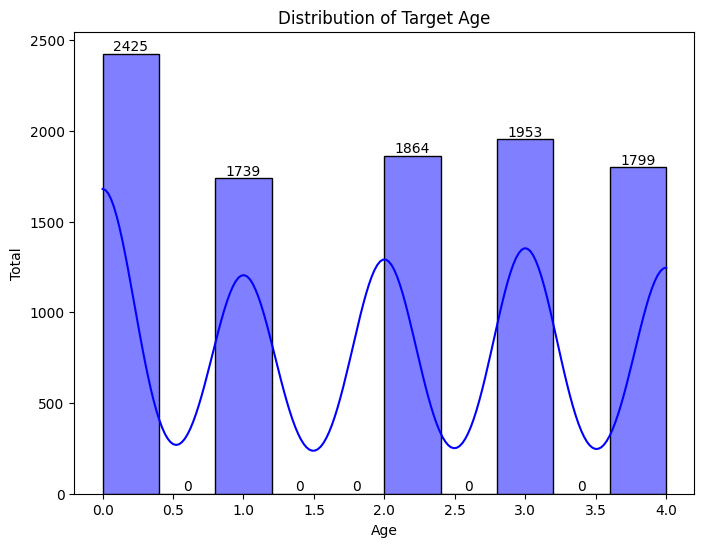

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(p_age, bins=10, kde=True, color='blue')

# Get the count for each bin
bin_counts, bin_edges = np.histogram(p_age, bins=10)

# Loop through the bins and add the text
for i, count in enumerate(bin_counts):
    plt.text(bin_edges[i] + 0.2, count, str(count), ha='center', va='bottom')

plt.title('Distribution of Target Age')
plt.xlabel('Age')
plt.ylabel('Total')
plt.show()

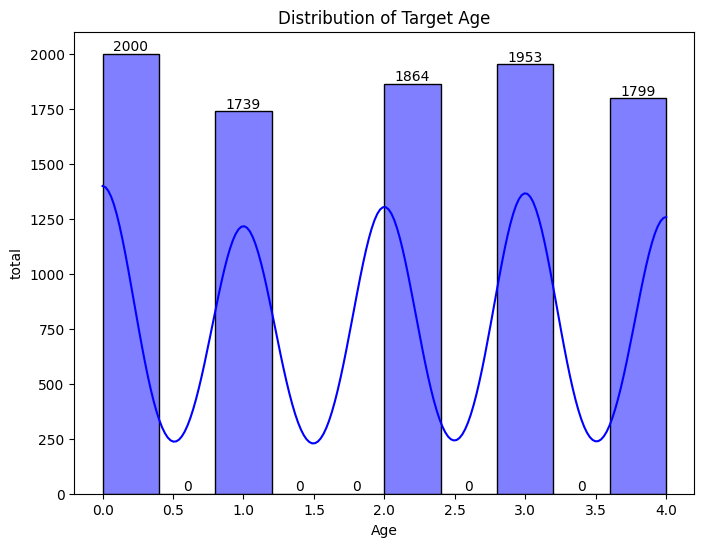

In [5]:
# Plotting target age
plt.figure(figsize=(8, 6))
sns.histplot(age_labels, bins=10, kde=True, color='blue')
bin_counts, bin_edges = np.histogram(age_labels, bins=10)

# Loop through the bins and add the text
for i, count in enumerate(bin_counts):
    plt.text(bin_edges[i] + 0.2, count, str(count), ha='center', va='bottom')
plt.title('Distribution of Target Age')
plt.xlabel('Age')
plt.ylabel('total')
plt.show()

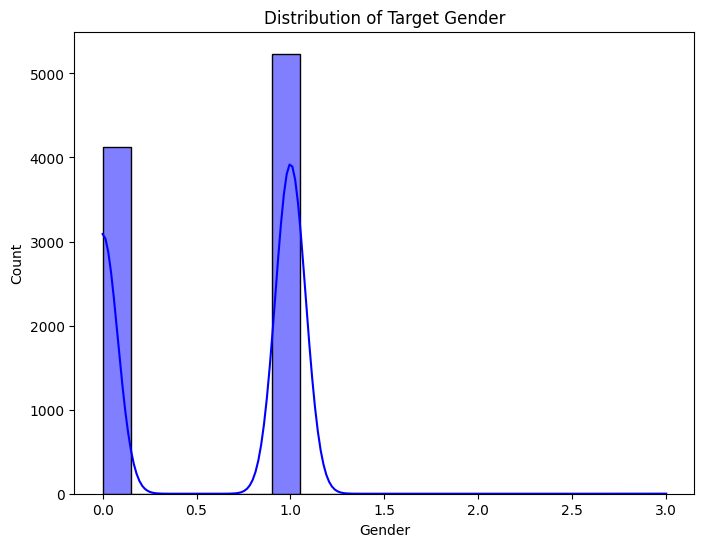

In [ ]:
# Plotting target gender
plt.figure(figsize=(8, 6))
sns.histplot(gender_labels, bins=20, kde=True, color='blue')
plt.title('Distribution of Target Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

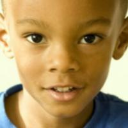

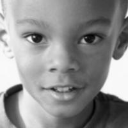

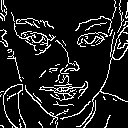

In [ ]:
image_path = os.path.join(dir_train, image_files[0])
img = cv.imread(image_path)
img = cv.resize(img, (128, 128))
img_original = img
# convert BGR to gray
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#using canny edge detection
img = canny_edge_detection(gray)
cv_imshow(img_original)
cv_imshow(gray)
cv_imshow(img)

In [ ]:
image_train = np.array(image_train)
age_labels = np.array(age_labels)
gender_labels = np.array(gender_labels)

In [ ]:
dataset_size = image_train.shape[0]
data = image_train.reshape(dataset_size,-1)
(X_train, X_test, y_train_age, y_test_age, y_train_gender, y_test_gender ) = train_test_split(data, age_labels, gender_labels, test_size= 0.2, random_state=42)

In [ ]:
X_train.shape

(7484, 16384)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(7484, 16384)

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)  # Adjust the number of components as needed
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(7484, 100)

#KNN + euclidean

Find best k

In [ ]:
param_grid = {'n_neighbors': range(1, 20)}
knn = KNeighborsClassifier( metric="euclidean")

# Perform grid search
kf = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=kf)
grid_search.fit(X_train, y_train_age)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'n_neighbors': 19}
Best score:  0.514828802218176


In [ ]:
param_grid = {'n_neighbors': range(1, 50)}
knn = KNeighborsClassifier( metric="euclidean")

# Perform grid search
kf = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=kf)
grid_search.fit(X_train, y_train_gender)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'n_neighbors': 45}
Best score:  0.7240793267904427


#KNN + cosine

In [ ]:
param_grid = {'n_neighbors': range(1, 20)}
knn = KNeighborsClassifier( metric="cosine")

# Perform grid search
kf = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=kf)
grid_search.fit(X_train, y_train_age)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'n_neighbors': 17}
Best score:  0.5303316068115916


In [ ]:
param_grid = {'n_neighbors': range(1, 50)}
knn = KNeighborsClassifier( metric="cosine")

# Perform grid search
kf = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=kf)
grid_search.fit(X_train, y_train_gender)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'n_neighbors': 33}
Best score:  0.722075479480747


# Train Model

In [ ]:
#model age
model_knn_age = KNeighborsClassifier(n_neighbors=17, metric = "cosine")
model_knn_age.fit(X_train, y_train_age)

#model gender
model_knn_gender = KNeighborsClassifier(n_neighbors=45, metric = "euclidean")
model_knn_gender.fit(X_train, y_train_gender)

KNeighborsClassifier(metric='euclidean', n_neighbors=45)

In [ ]:
y_pred_age = model_knn_age.predict(X_test)
y_pred_gender = model_knn_gender.predict(X_test)



ac_age = accuracy_score(y_test_age, y_pred_age)
ac_gender = accuracy_score(y_test_gender, y_pred_gender)
print(classification_report(y_test_age, y_pred_age))
print(classification_report(y_test_gender, y_pred_gender))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72       415
           1       0.44      0.41      0.43       352
           2       0.50      0.42      0.45       364
           3       0.45      0.41      0.43       382
           4       0.56      0.57      0.56       359

    accuracy                           0.53      1872
   macro avg       0.52      0.52      0.52      1872
weighted avg       0.52      0.53      0.52      1872

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       814
           1       0.78      0.72      0.75      1058

    accuracy                           0.73      1872
   macro avg       0.72      0.73      0.72      1872
weighted avg       0.73      0.73      0.73      1872



In [ ]:
cf_matrix_gender_knn = confusion_matrix(y_test_gender, y_pred_gender)
cf_matrix_age_knn = confusion_matrix(y_test_age, y_pred_age)

<Axes: >

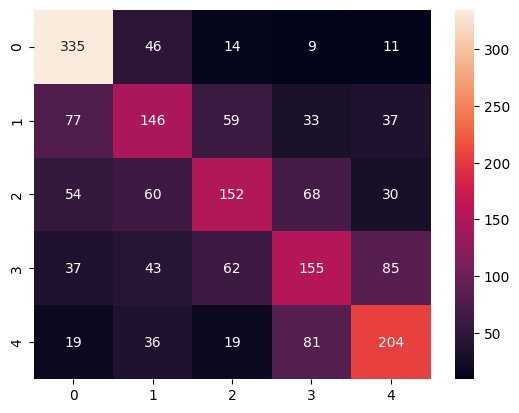

In [ ]:
sns.heatmap(cf_matrix_age_knn, annot=True, fmt='d')

<Axes: >

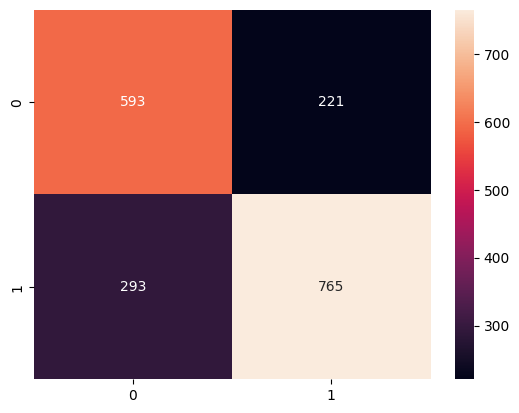

In [ ]:
sns.heatmap(cf_matrix_gender_knn, annot=True, fmt='d')

In [ ]:
joblib_file_age = "/content/drive/MyDrive/CV_FinalProject/Source_code/Dataset/Pre-trained/Age_KNN_Model.pkl"
joblib.dump(model_knn_age, joblib_file_age)
joblib_file_gender = "/content/drive/MyDrive/CV_FinalProject/Source_code/Dataset/Pre-trained/Gender_KNN_Model.pkl"
joblib.dump(model_knn_gender, joblib_file_gender)

['/content/drive/MyDrive/CV_FinalProject/Source_code/Dataset/Pre-trained/Gender_KNN_Model.pkl']

# Prediction

In [ ]:
joblib_file_age = "/content/drive/MyDrive/CV_FinalProject/Source_code/Dataset/Pre-trained/Age_KNN_Model.pkl"
joblib_file_gender = "/content/drive/MyDrive/CV_FinalProject/Source_code/Dataset/Pre-trained/Gender_KNN_Model.pkl"
joblib_pca = '/content/drive/MyDrive/CV_FinalProject/Source_code/Dataset/Pre-trained/pca.pkl'
joblib_scale = '/content/drive/MyDrive/CV_FinalProject/Source_code/Dataset/Pre-trained/scaler.pkl'

model_age = joblib.load(joblib_file_age)
model_gender = joblib.load(joblib_file_gender)
PCA = joblib.load(joblib_pca)
scale = joblib.load(joblib_scale)

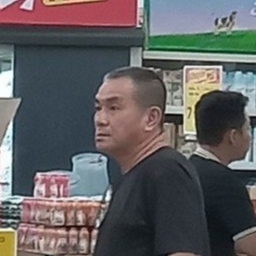

In [ ]:
arr_test = []
img_path_test = '/content/drive/MyDrive/CV_FinalProject/Source_code/Dataset/Test/img2.jpg'
# img_path_test = os.path.join(dir_train, image_files[80])
img_test = cv.imread(img_path_test)
cv_imshow(img_test)
gray = cv.cvtColor(img_test, cv.COLOR_BGR2GRAY)
show_image = img_test
img_test = cv.resize(gray, (128,128))
img_test= canny_edge_detection(img_test)


In [ ]:

data_test = img_test.reshape(1, -1)
data_test.shape
data_test = scale.transform(data_test)
data_test = PCA.transform(data_test)
pred_age = model_age.predict(data_test)[0]
pred_gender = model_gender.predict(data_test)[0]
print(pred_age)
print(pred_gender)

4
0


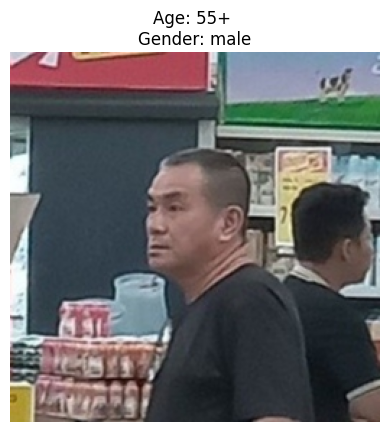

In [ ]:
gender = 'male' if pred_gender == 0 else 'female'
age = ['0-6', '7-19', '20-32', '33-55', '55+']
age_label = age[pred_age]

# Display the original image with prediction results
img_origin = cv.imread(img_path_test)
img_rgb = cv.cvtColor(img_origin, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f'Age: {age_label} \nGender: {gender}')
plt.axis('off')
plt.show()

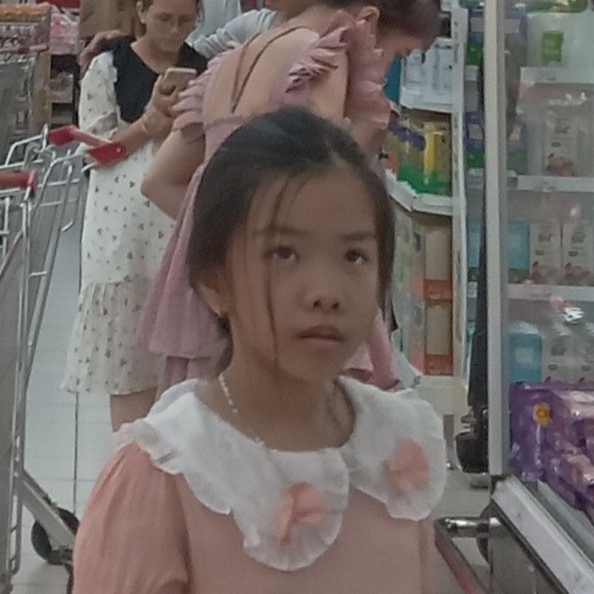

In [ ]:
arr_test = []
img_path_test = '/content/drive/MyDrive/CV_FinalProject/Source_code/Dataset/Test/img8.jpg'
# img_path_test = os.path.join(dir_train, image_files[80])
img_test = cv.imread(img_path_test)
cv_imshow(img_test)
gray = cv.cvtColor(img_test, cv.COLOR_BGR2GRAY)
show_image = img_test
img_test = cv.resize(gray, (128,128))
img_test= canny_edge_detection(img_test)


In [ ]:
data_test = img_test.reshape(1, -1)
data_test.shape
data_test = scale.transform(data_test)
data_test = PCA.transform(data_test)
pred_age = model_age.predict(data_test)[0]
pred_gender = model_gender.predict(data_test)[0]

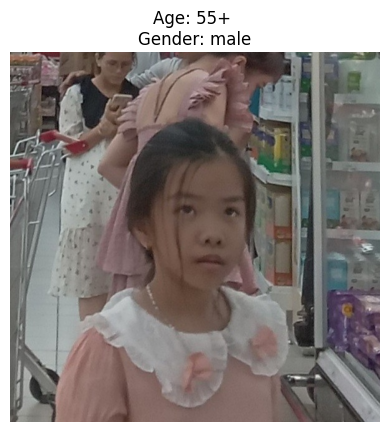

In [ ]:
gender = 'male' if pred_gender == 0 else 'female'
age = ['0-6', '7-19', '20-32', '33-55', '55+']
age_label = age[pred_age]

# Display the original image with prediction results
img_origin = cv.imread(img_path_test)
img_rgb = cv.cvtColor(img_origin, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f'Age: {age_label} \nGender: {gender}')
plt.axis('off')
plt.show()